# <font color = #1DB954> Spotify Top Chart Songs 2022

### Dataset with global top chart songs during 2022
## Практическое задание №2
### Выполнил Рухадзе Александр, студент 2-го курса МЦТиМК НИУ ВШЭ группы ММР-213

*Ссылка на датасет (Kaggle) - URL: https://www.kaggle.com/datasets/sveta151/spotify-top-chart-songs-2022*

###  Краткое описание датасета
**"Spotify Top Chart Songs 2022"** содержит данные о 646 песнях, которые "вирусились" на стриминговом сервисе Spotify на сентябрь 2022 года. Датасет состоит из 17 переменных, среди них есть как текстовые (название трека и имя исполнителя), так и количественные переменные (примеры: пиковая позиция трека, число недель в чарте, продолжительность трека и др.). Подробное описание переменных датасета представлено ниже.

### Описание переменных датасета
• **uri** - URI-код трека<br>
• **artist_names** - Имя (имена) исполнителя (исполнителей) трека<br>
• **track_name** - Название трека<br>
• **peak_rank** - Пиковая позиция трека в чарте Spotify<br>
• **weeks_on_chart** - Число недель, проведенных в чарте Spotify<br>
• **danceability** - Степень танцевальности трека (от 0.0 до 1.0, где 0.0 - нетанцевальная, а 1.0 - танцевальная)<br>
• **energy** - Степень энергичности трека (от 0.0 до 1.0, где 0.0 - неэнергичная, а 1.0 - энергичная)<br>
• **key** - Тональность трека (от 0 до 11, где 0 - до-мажор, 1 = до-диез мажор/ре-бемоль минор и т.д.)<br>
• **loudness** - Громкость трека (в dB)<br>
• **mode** - Лад трека (0 или 1, где 0 - минор, а 1 - мажор)<br>
• **speechiness** - Преобладание слов в треке (от 0.0 до 1.0, где 0.0 - только музыка, а 1.0 - только слова)<br>
• **acousticness** - Акустичность трека (от 0.0 до 1.0, где 0.0 - неакустическая, а 1.0 - акустическая)<br>
• **instrumentalness** - Инструментальность трека (от 0.0 до 1.0, где 0.0 - вокальная песня, а 1.0 - инструментальная)<br>
• **liveness** - Форма исполнения трека (от 0.0 до 1.0, где 0.0 - песня записана в студии, а 1.0 - песня исполнена вживую перед зрителями)<br> 
• **tempo** - Темп трека (в BPM; чем выше значение, тем быстрее темп песни)<br>
• **time_signature** - Размер такта в треке (1/4, 3/4, 4/4 или 5/4)<br> 
• **duration_ms** - Продолжительность трека (в мс, миллисекундах)

В этой практической работе продолжим анализ данных чарта Spotify 2022 года, основным фокусом станут темы, которые не были рассмотрены в первой работе - это проверка гипотез и регрессионный анализ.

---

### <font color = #1DB954> Часть 1. Импорт и подготовка датасета

Начнем с того, что снова загрузим датасет через **pandas** и попробуем вывести верхние 3 строчки наблюдений через **head( )**.

In [1]:
import numpy as np
import pandas as pd

In [2]:
spotify_top_charts = pd.read_csv('Desktop/Data Science/ДЗ 1/spotify_top_charts_22.csv')
spotify_top_charts.head(3)

,uri,artist_names,track_name,peak_rank,weeks_on_chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
0,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,1,65,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,80.870,4,238805
1,spotify:track:5PjdY0CKGZdEuoNab3yDmX,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),1,37,0.591,0.764,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,169.928,4,141806
2,spotify:track:3IAfUEeaXRX9s9UdKOJrFI,Anitta,Envolver,3,3,0.812,0.736,4,-5.421,0,0.0833,0.1520,0.002540,0.0914,91.993,4,193806


Переменные с URI-кодом (*'uri'*) и громкости (*'loudness'*) нам не потребуются при дальнейшем анализе, поэтому удалим эти лишние столбцы через **drop( )** и пересохраним датасет под названием *spotify*.

In [3]:
spotify = spotify_top_charts.drop(axis=1, index=None, columns=['uri', 'loudness'], inplace=False, errors='ignore')
spotify.head()

,artist_names,track_name,peak_rank,weeks_on_chart,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
0,Glass Animals,Heat Waves,1,65,0.761,0.525,11,1,0.0944,0.4400,0.000007,0.0921,80.870,4,238805
1,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),1,37,0.591,0.764,1,1,0.0483,0.0383,0.000000,0.1030,169.928,4,141806
2,Anitta,Envolver,3,3,0.812,0.736,4,0,0.0833,0.1520,0.002540,0.0914,91.993,4,193806
3,"Imagine Dragons, JID, Arcane, League of Legends",Enemy (with JID) - from the series Arcane Leag...,3,21,0.728,0.783,11,0,0.2660,0.2370,0.000000,0.4340,77.011,4,173381
4,GAYLE,abcdefu,1,19,0.695,0.540,4,1,0.0493,0.2990,0.000000,0.3670,121.932,4,168602


Проверим датасет *spotify* на наличие пропущенных значений через **isna( )**.

In [4]:
spotify.isna().sum()

artist_names        0
track_name          0
peak_rank           0
weeks_on_chart      0
danceability        0
energy              0
key                 0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
tempo               0
time_signature      0
duration_ms         0
dtype: int64

**Вывод**: В датасете *spotify* не обнаружены пропущенные значения, значит, можем продолжить работу без дополнительных действий с данными.

Заменим столбец с продолжительностью треков в миллисекундах на продолжительность треков в секундах.

In [5]:
spotify['duration_sec'] = round(spotify['duration_ms'] / 1000, 0)

In [6]:
del spotify['duration_ms']
spotify.head(3)

,artist_names,track_name,peak_rank,weeks_on_chart,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_sec
0,Glass Animals,Heat Waves,1,65,0.761,0.525,11,1,0.0944,0.4400,0.000007,0.0921,80.870,4,239.0
1,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),1,37,0.591,0.764,1,1,0.0483,0.0383,0.000000,0.1030,169.928,4,142.0
2,Anitta,Envolver,3,3,0.812,0.736,4,0,0.0833,0.1520,0.002540,0.0914,91.993,4,194.0


Добавим новую переменную с категориями треков по их темпу (*'tempo'*):

In [7]:
spotify['tempo'].mean()

121.09157120743038

Средний темп треков в датасете составляет *~120 BPM*, поэтому будет отталкиваться от этого значения и разделим все треки по темпу на следующие четыре категории:

In [8]:
def get_tempo_cat (tempo):
    if tempo < 90:
        return 'Low'
    elif tempo < 120:
        return 'Middle-'
    elif tempo < 150:
        return 'Middle+'
    elif tempo >= 150:
        return 'High'
    else:
        return tempo

In [9]:
spotify['tempo_cat'] = spotify['tempo'].apply(get_tempo_cat)

In [10]:
spotify['tempo_cat'] = pd.Categorical(spotify['tempo_cat'])

In [11]:
spotify.head(3)

,artist_names,track_name,peak_rank,weeks_on_chart,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_sec,tempo_cat
0,Glass Animals,Heat Waves,1,65,0.761,0.525,11,1,0.0944,0.4400,0.000007,0.0921,80.870,4,239.0,Low
1,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),1,37,0.591,0.764,1,1,0.0483,0.0383,0.000000,0.1030,169.928,4,142.0,High
2,Anitta,Envolver,3,3,0.812,0.736,4,0,0.0833,0.1520,0.002540,0.0914,91.993,4,194.0,Middle-


---

### <font color = #1DB954> Часть 2. Тестирование гипотез: Непараметрические критерии

Проведем тестирование №1 гипотезы при помощи критерия хи-квадрат (Пирсона) - это пример непараметрического теста.

#### H0: Темпы треков и "хитовость" в чарте независимы друг от друга.
#### H1: Между темпами треков и "хитовостью" в чарте есть зависимость.

Для начала определимся, что понимается под "хитовостью" в чарте. Пусть это будет число недель, которое трек провел в чарте Spotify, и мы будем отталкиваться от среднего значения в датасете:

In [12]:
spotify['weeks_on_chart'].mean()

19.4984520123839

In [13]:
def get_weeks_on_chart_cat (weeks_on_chart):
    if weeks_on_chart < 19.5:
        return 'Not hit'
    elif weeks_on_chart >= 19.5:
        return 'Hit'
    else:
        return weeks_on_chart

In [14]:
spotify['hit'] = spotify['weeks_on_chart'].apply(get_weeks_on_chart_cat)

In [15]:
spotify['hit'] = pd.Categorical(spotify['hit'])

In [16]:
spotify.head(3)

,artist_names,track_name,peak_rank,weeks_on_chart,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_sec,tempo_cat,hit
0,Glass Animals,Heat Waves,1,65,0.761,0.525,11,1,0.0944,0.4400,0.000007,0.0921,80.870,4,239.0,Low,Hit
1,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),1,37,0.591,0.764,1,1,0.0483,0.0383,0.000000,0.1030,169.928,4,142.0,High,Hit
2,Anitta,Envolver,3,3,0.812,0.736,4,0,0.0833,0.1520,0.002540,0.0914,91.993,4,194.0,Middle-,Not hit


Построим таблицу сопряженности по *tempo_cat* и новой переменной *hit*:

In [17]:
ct_o = spotify.groupby('tempo_cat')['hit'].value_counts().unstack()
ct_o

,Not hit,Hit
tempo_cat,,
High,73,27
Low,65,19
Middle+,165,48
Middle-,181,68


Теперь можно рассчитать значение критерия хи-квадрат с использованием библиотеки scipy.stats.

In [18]:
import scipy.stats

In [19]:
scipy.stats.chi2_contingency(ct_o)

(1.8597119732196812,
 0.6020279317040864,
 3,
 array([[ 74.92260062,  25.07739938],
        [ 62.93498452,  21.06501548],
        [159.58513932,  53.41486068],
        [186.55727554,  62.44272446]]))

Значение критерия хи-квадрат получилось 1.86, теперь необходимо сравнить его с критическим значением.

In [20]:
alpha = 0.05

In [21]:
chi_square = 1.86

In [22]:
critical_value = scipy.stats.chi2.ppf(0.95, 3)
critical_value

7.814727903251179

In [23]:
if chi_square > critical_value:
    print('Отвергаем Н0')
else:
    print('Не отвергаем Н0')

Не отвергаем Н0


#### H0: Темпы треков и "хитовость" в чарте независимы друг от друга.

**Вывод**: В этом тесте значение хи-квадрат оказалось меньше критического значения, значит, с вероятностью 95% принимаем нулевую гипотезу о том, что темпы треков и "хитовость" в чарте независимы друг от друга.

Проведем тестирование №2 гипотезы при помощи критерия хи-квадрат (Пирсона) - это еще один пример непараметрического теста.

#### H0: Тональность трека и его "хитовость" в чарте независимы друг от друга.
#### H1: Между тональностью трека и его "хитовостью" в чарте есть зависимость.

Построим таблицу сопряженности по переменным *key* и *hit*:

In [24]:
ct_o_2 = spotify.groupby('key')['hit'].value_counts().unstack()
ct_o_2

,Not hit,Hit
key,,
0,49,14
1,76,28
2,41,15
3,22,5
4,34,11
5,44,11
6,25,13
7,41,11
8,46,19


In [25]:
scipy.stats.chi2_contingency(ct_o_2)

(5.081988600521148,
 0.9271309569602627,
 11,
 array([[47.20123839, 15.79876161],
        [77.91950464, 26.08049536],
        [41.95665635, 14.04334365],
        [20.22910217,  6.77089783],
        [33.71517028, 11.28482972],
        [41.20743034, 13.79256966],
        [28.47058824,  9.52941176],
        [38.95975232, 13.04024768],
        [48.6996904 , 16.3003096 ],
        [31.46749226, 10.53250774],
        [33.71517028, 11.28482972],
        [40.45820433, 13.54179567]]))

Значение критерия хи-квадрат получилось 5.08, теперь необходимо сравнить его с критическим значением.

In [26]:
alpha = 0.05

In [27]:
chi_square_2 = 5.08

In [28]:
critical_value_2 = scipy.stats.chi2.ppf(0.95, 10)
critical_value_2

18.307038053275146

In [29]:
if chi_square_2 > critical_value_2:
    print('Отвергаем Н0')
else:
    print('Не отвергаем Н0')

Не отвергаем Н0


#### H0: Тональность трека и его "хитовость" в чарте независимы друг от друга.

**Вывод**: В этом тесте значение хи-квадрат снова оказалось меньше критического значения, значит, с вероятностью 95% принимаем нулевую гипотезу о том, что тональность трека и его "хитовость" в чарте независимы друг от друга.

---

### <font color = #1DB954> Часть 3. Тестирование гипотез: Параметрические критерии

Проведем тестирование №1 гипотезы при помощи двухвыборочного t-теста - это уже пример параметрического теста.

#### H0: Среднее число недель пребывания в чарте топ-5 артистов равно среднему числу недель пребывания в чарте следующих артистов.
#### H1: Среднее число недель пребывания в чарте топ-5 артистов НЕ равно среднему числу недель пребывания в чарте следующих артистов.

Для начала нам нужно определиться с топ-артистами и следующими (following). Чтобы группы были более равномерными по числу наблюдений, в качестве топ-артистов возьмем 5 исполнителей-лидеров по числу сольных попаданий в чарт Spotify 2022, а в качестве следующих артистов возьмем 15 исполнителей, которые не смогли войти в этот ТОП-5 артистов.

In [30]:
spotify['artist_names'].value_counts().head(20)

The Weeknd        20
Bad Bunny         19
Harry Styles      18
Beyoncé           14
Drake             13
Kendrick Lamar    12
Taylor Swift       8
Olivia Rodrigo     7
Future             7
BTS                7
Post Malone        7
ROSALÍA            6
Doja Cat           6
Billie Eilish      5
Labrinth           5
Ed Sheeran         5
Bruno Mars         4
XXXTENTACION       4
Jack Harlow        4
Arctic Monkeys     4
Name: artist_names, dtype: int64

В группу топ-артистов в 2022 году попали 5 исполнителей (The Weeknd, Bad Bunny, Harry Styles, Beyonce и Drake), всего 84 треков (наблюдений).

In [31]:
top_artists = spotify[(spotify['artist_names'] == 'The Weeknd')|(spotify['artist_names'] == 'Bad Bunny')\
|(spotify['artist_names'] == 'Harry Styles')|(spotify['artist_names'] == 'Beyoncé')\
|(spotify['artist_names'] == 'Drake')]

В группу последующих артистов в 2022 году попали 15 исполнителей с Kendrick Lamar по Arctic Monkeys, всего 91 треков (наблюдений).

In [32]:
other_artists = spotify[(spotify['artist_names'] == 'Kendrick Lamar')|(spotify['artist_names'] == 'Taylor Swift')\
|(spotify['artist_names'] == 'Olivia Rodrigo')|(spotify['artist_names'] == 'Future')\
|(spotify['artist_names'] == 'BTS')|(spotify['artist_names'] == 'Post Malone')|(spotify['artist_names'] == 'ROSALÍA')\
|(spotify['artist_names'] == 'Doja Cat')|(spotify['artist_names'] == 'Billie Eilish')\
|(spotify['artist_names'] == 'Labrinth')|(spotify['artist_names'] == 'Ed Sheeran')\
|(spotify['artist_names'] == 'Bruno Mars')|(spotify['artist_names'] == 'XXXTENTACION')\
|(spotify['artist_names'] == 'Jack Harlow')|(spotify['artist_names'] == 'Arctic Monkeys')]

Проведем проверку на одинаковость дисперсий в сформированных группах:

In [33]:
print(top_artists['weeks_on_chart'].var())
print(other_artists['weeks_on_chart'].var())

614.328169822145
2468.2639804639816


В данном случае дисперсии оказались не равны, значит, нам потребуется применить поправку Уэлча при расчете значения t-статистики, т.е. задаем equal_var = False.

In [34]:
scipy.stats.ttest_ind(other_artists['weeks_on_chart'], top_artists['weeks_on_chart'], equal_var=False)

Ttest_indResult(statistic=2.1447492511608215, pvalue=0.033770498109934204)

Теперь сравним полученное значение и критическое значение t-критерия:

In [35]:
t = 2.145

In [36]:
dof = len(top_artists) + len(other_artists) - 2
print(dof)

173


In [37]:
from scipy import stats
t_crit = stats.t.ppf(q = 0.95, df = 173)
t_crit

1.653709183839421

In [38]:
def hypothesis_check(t, t_crit):
    if abs(t) > t_crit:
        print('Отвергаем H0. Разница между средними статистически значима.')
    else:
        print('Не удалось отвергнуть H0.')

In [39]:
hypothesis_check(t, t_crit)

Отвергаем H0. Разница между средними статистически значима.


#### H1: Среднее число недель пребывания в чарте топ-5 артистов НЕ равно среднему числу недель пребывания в чарте следующих артистов.

**Вывод**: В этом тесте значение t-статистики оказалось больше критического значения, значит, с вероятностью 95% можем отвергнуть нулевую гипотезу о том, что среднее число недель пребывания в чарте топ-5 артистов равно среднему числу недель пребывания в чарте следующих артистов.

Проведем тестирование №2 гипотезы при помощи двухвыборочного t-теста - это еще один пример параметрического теста.

#### H0: Средняя длительность хит-треков совпадает со средней длительностью не-хитов.
#### H1: Средняя длительность хит-треков НЕ совпадает со средней длительностью не-хитов.

Согласно определению хита, которое мы задали выше, в нашем датасете 162 композиции-хита и 484 не-хита.

In [40]:
hits = spotify[spotify['hit'] == 'Hit']

In [41]:
not_hits = spotify[spotify['hit'] == 'Not hit']

Проведем проверку на одинаковость дисперсий в этих группах:

In [42]:
print(hits['duration_sec'].var())
print(not_hits['duration_sec'].var())

1931.9067939575186
3375.9940583132293


Дисперсии оказались не равны, значит, нам снова потребуется применить поправку Уэлча при расчете значения t-статистики, т.е. задаем equal_var = False.

In [43]:
scipy.stats.ttest_ind(hits['duration_sec'], not_hits['duration_sec'], equal_var=False)

Ttest_indResult(statistic=1.6529076700097867, pvalue=0.09921417908879936)

In [44]:
t2 = 1.653

In [45]:
dof = len(hits) + len(not_hits) - 2
print(dof)

644


In [46]:
t_crit_2 = stats.t.ppf(q = 0.95, df = 644)
t_crit_2

1.647223156149483

In [47]:
def hypothesis_check(t2, t_crit_2):
    if abs(t2) > t_crit_2:
        print('Отвергаем H0. Разница между средними статистически значима.')
    else:
        print('Не удалось отвергнуть H0.')

In [48]:
hypothesis_check(t2, t_crit_2)

Отвергаем H0. Разница между средними статистически значима.


#### H1: Средняя длительность хит-треков НЕ совпадает со средней длительностью не-хитов.

**Вывод**: В этом тесте значение t-статистики оказалось чуть больше критического значения, значит, с вероятностью 95% можем отвергнуть нулевую гипотезу о том, что средняя длительность хит-треков совпадает со средней длительностью не-хитов.

---

### <font color = #1DB954> Часть 4. Линейная регрессия

В этой части работы нашей задачей будет построение модели линейной регрессии, в которой число недель в чарте Spotify 2022 (*'weeks_on_chart'*) будет зависимой переменной.

**№1.** Проверим предпосылку на отсутствие мультиколлинеарности, для этого построим тепловую матрицу корреляций:

In [49]:
spotify_num = spotify[['weeks_on_chart', 'danceability', 'energy', 'speechiness', 'acousticness', \
                    'instrumentalness', 'liveness', 'tempo', 'duration_sec']]

In [50]:
spotify_table = spotify_num.corr()

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Тепловая матрица корреляций')

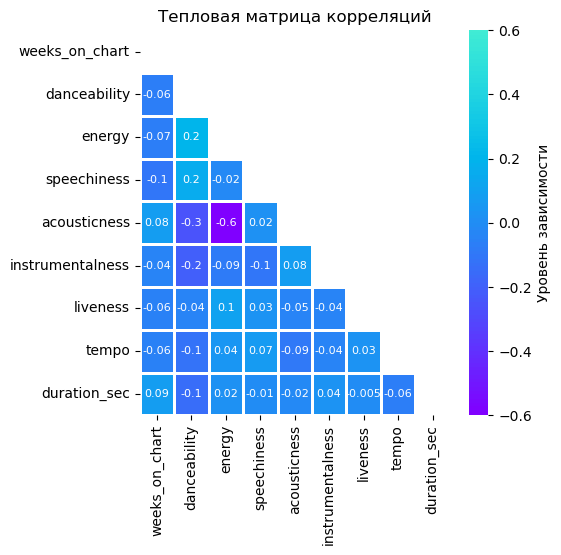

In [52]:
plt.figure(figsize = (5, 5))
matrix = np.triu(spotify_table)
sns.heatmap(spotify_table, annot=True, mask=matrix, center=1, linecolor='white', linewidth=2, \
           annot_kws = {'size': 8}, cmap = 'rainbow', vmax=0.6, vmin=-0.6, fmt= '.1g', \
           cbar_kws = {'label': 'Уровень зависимости'})
plt.title('Тепловая матрица корреляций')

**Вывод №1:** Все коэффициенты корреляций по модулю < 0.9, значит, мультиколлинеарность отсутствует, можно продолжать работу.

**№2.** Проверим другую предпосылку на наличие линейной взаимосвязи:

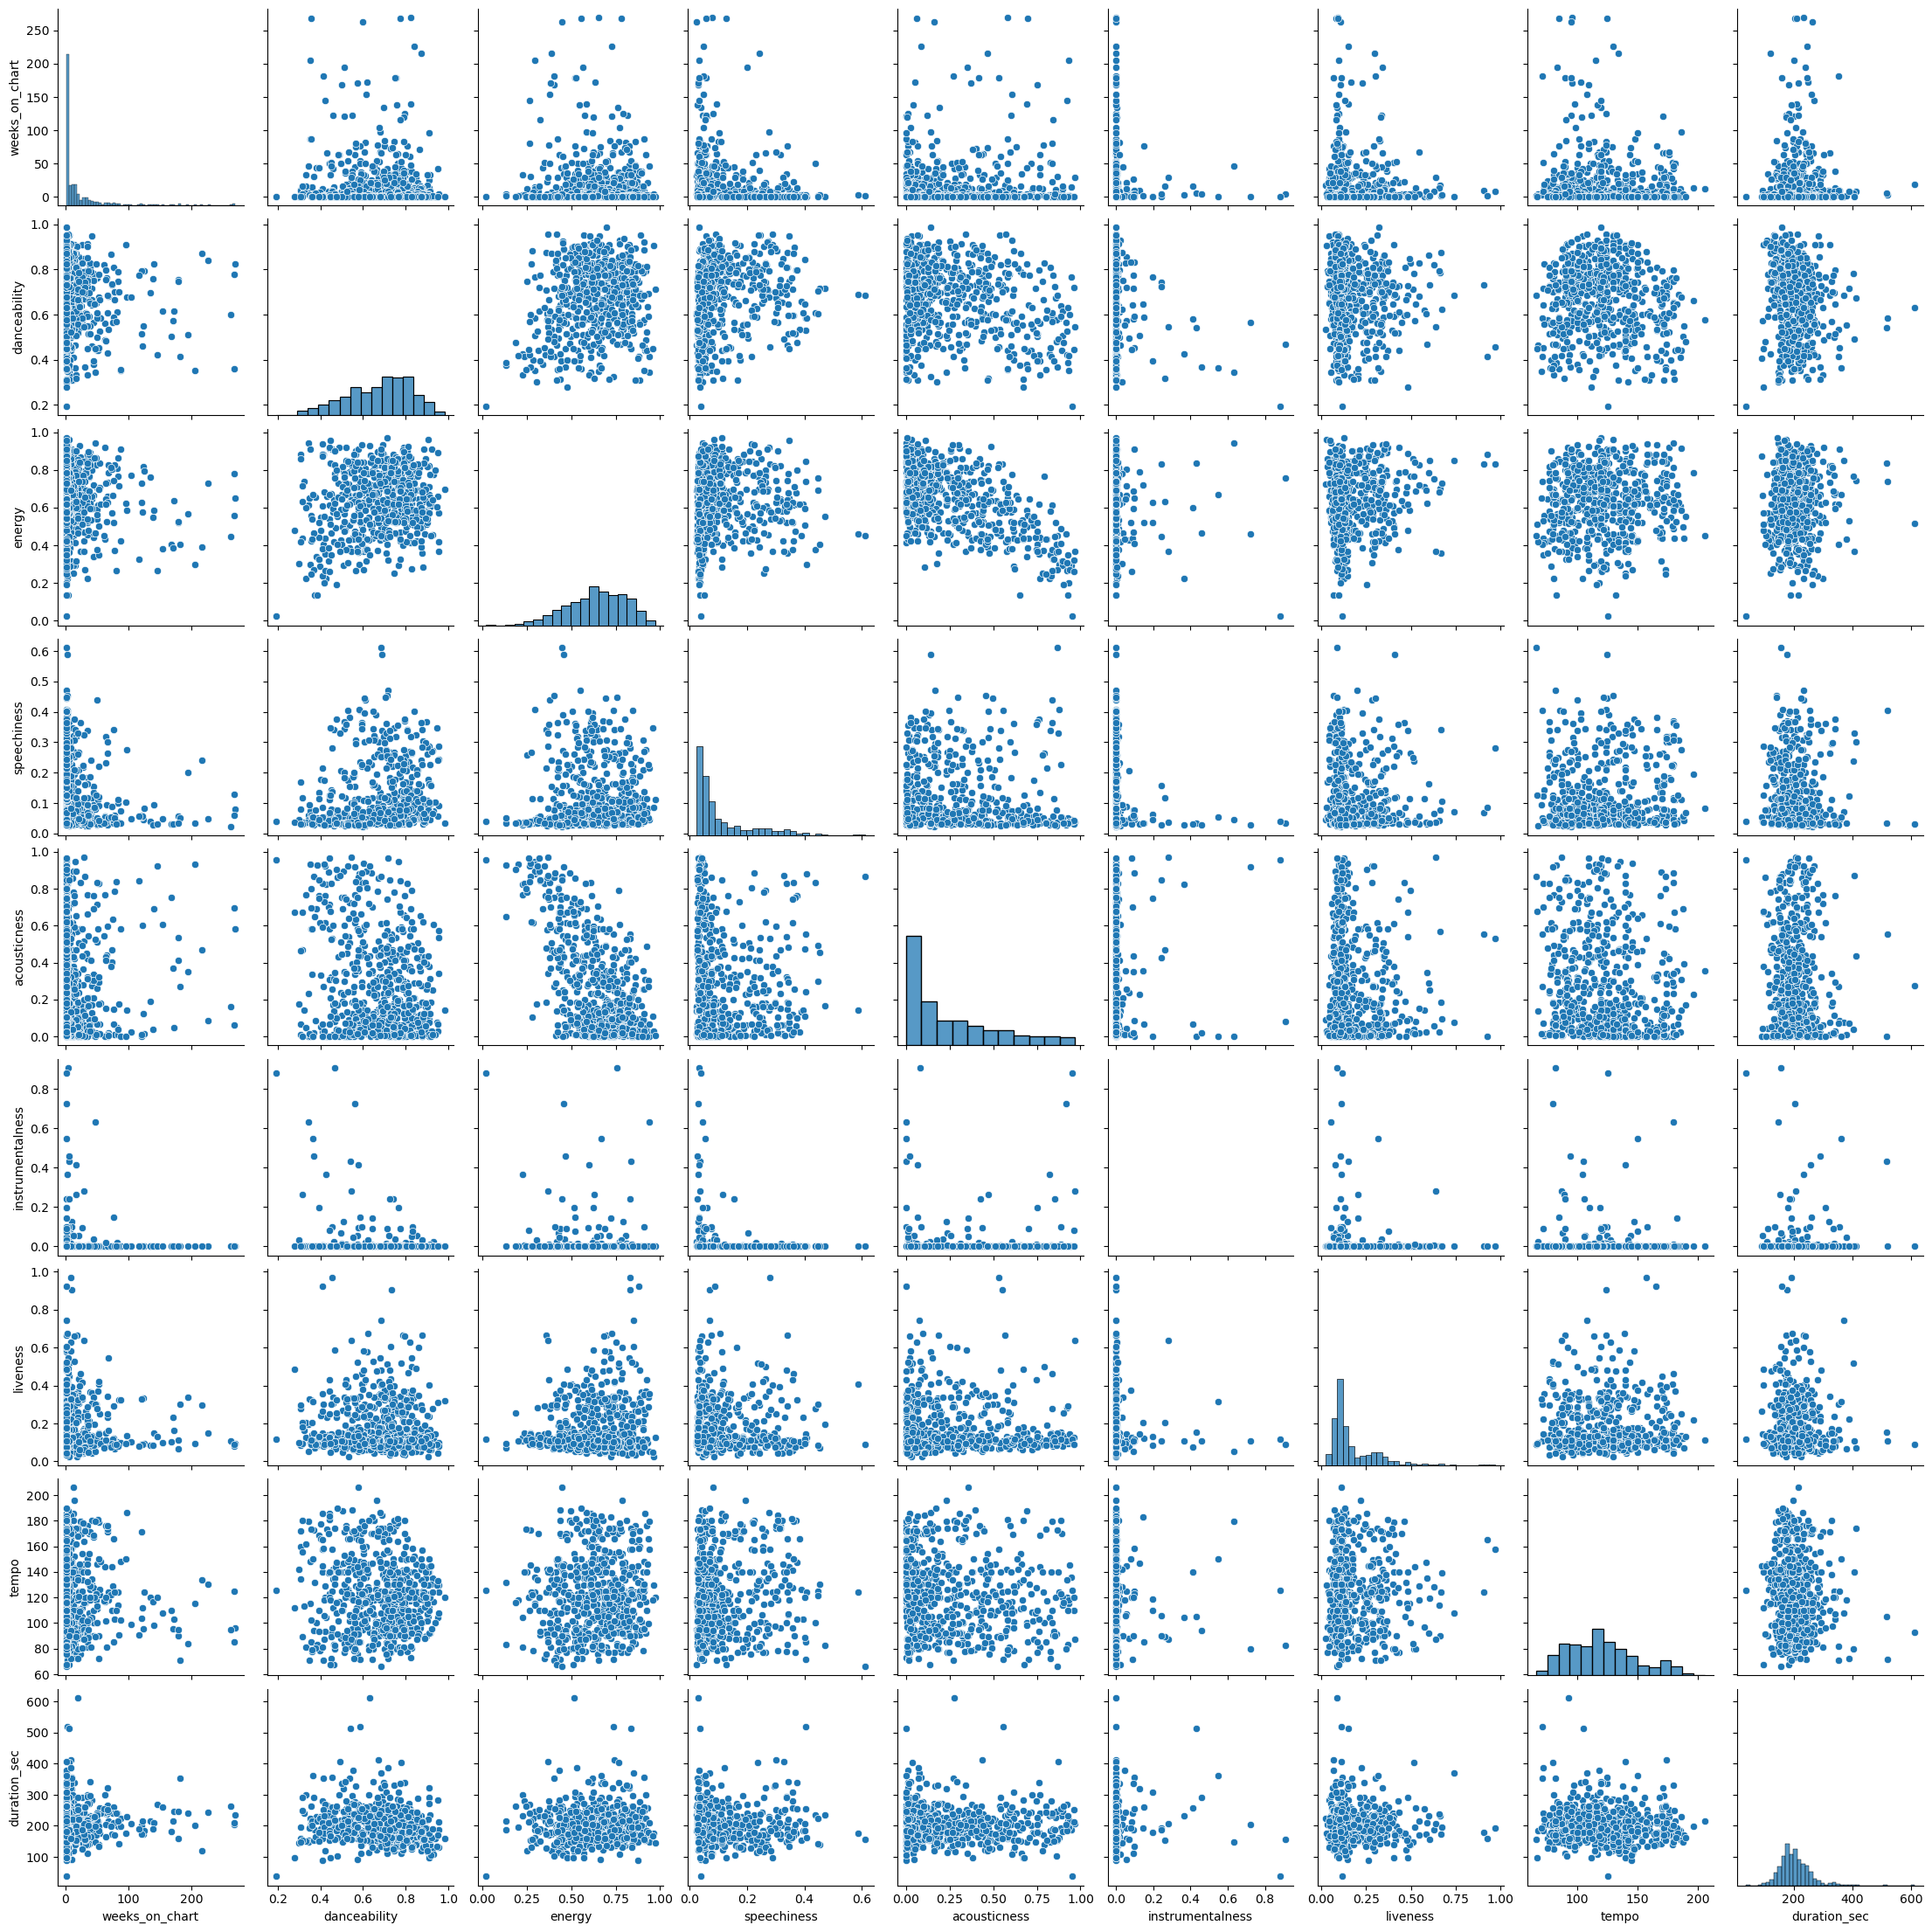

In [53]:
sns.pairplot(spotify_num)

**Вывод №2:** Вывелось много красивых графиков, давайте попробуем построить линейную регресию и посмотреть на результаты.

В качестве первой модели построим **простую линейную регрессию** с одним предиктором, а именно зависимостью числа недель в чарте (*'weeks_on_chart'*) от длительности треков в секундах (*'duration_sec'*).

In [54]:
import statsmodels.api as sm

In [55]:
X_simple = spotify_num['duration_sec']
y = spotify_num['weeks_on_chart']
X_simple_constant = sm.add_constant(X_simple)

model = sm.OLS(y, X_simple_constant)
res_simple = model.fit()
print(res_simple.summary())

                            OLS Regression Results                            
Dep. Variable:         weeks_on_chart   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     4.698
Date:                Wed, 14 Dec 2022   Prob (F-statistic):             0.0306
Time:                        22:38:53   Log-Likelihood:                -3260.5
No. Observations:                 646   AIC:                             6525.
Df Residuals:                     644   BIC:                             6534.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.5760      5.697      1.330   

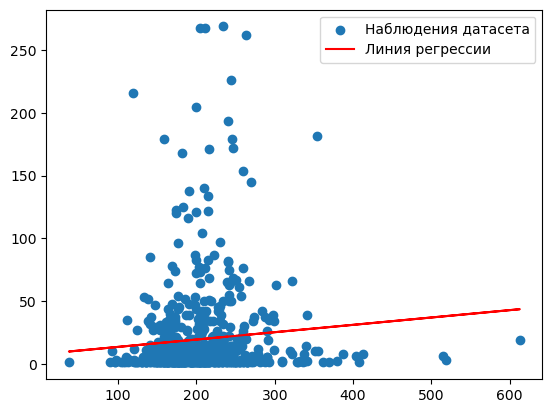

In [56]:
plt.scatter(X_simple, y, label = 'Наблюдения датасета')
plt.plot(X_simple, 7.5760 + 0.0586*X_simple, 'r', label = 'Линия регрессии')
plt.legend()
plt.show()

**Вывод:** Предиктор, т.е. длительность треков (в сек) *'duration_sec'*, оказывается значимым при уровне доверия 95% и положительно влияет на число недель пребывания в чарте. Низкое значение коэффициента R-squared (0.007) может говорить нам о том, что эта модель слабо объясняет наблюдения нашего датасета.

В качестве альтернативной модели построим **множественную линейную регрессию**, где зависимой переменной все также остается число недель в чарте (*'weeks_on_chart'*), а все остальные переменные будут предикторами.

In [57]:
X_mult = sm.add_constant(spotify_num.drop('weeks_on_chart', axis=1))
y = spotify_num['weeks_on_chart']

model = sm.OLS(y, X_mult)
res_mult = model.fit()
print(res_mult.summary())

                            OLS Regression Results                            
Dep. Variable:         weeks_on_chart   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     3.042
Date:                Wed, 14 Dec 2022   Prob (F-statistic):            0.00229
Time:                        22:39:23   Log-Likelihood:                -3250.7
No. Observations:                 646   AIC:                             6519.
Df Residuals:                     637   BIC:                             6560.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               31.5432     15.349  

**Вывод:** Значимыми при уровне доверия 95% оказываются свободный член const (+), показатель преобладания слов в треке speechiness (-) и длительность треков duration_sec (+):<br>
1) Чем больше слов в треке (и меньше музыки), скорее всего, тем меньше недель трек проведет в чарте Spotify;<br>
2) Чем дольше длительность трека в секундах, скорее всего, тем больше недель он проведет в чарте Spotify.

Отметим, что значение коэффициента R-squared возросло с 0.007 до 0.037, значит, эта модель стала чуть лучше объяснять наблюдения датасета, если сравнивать с моделью простой линейной регрессии с одним предиктором.

---

### <font color = #1DB954> Часть 5. Логистическая регрессия

В этой части работы нашей задачей будет построение модели логистической регрессии, в которой "хитовость" песни в чарте Spotify 2022 (*'hit_0_1'*) будет зависимой переменной.

Переменную "хитовости" песни мы уже задали выше в "Части 2. Тестирование гипотез: Непараметрические критерии", единственное, сейчас нужно перекодировать названия в бинарную переменную (пусть "Hit" - это 1, а "Not hit" - это 0):

In [58]:
def get_hit_cat (hit):
    if hit == 'Hit':
        return 1
    elif hit == 'Not hit':
        return 0
    else:
        return hit

In [59]:
spotify['hit_0_1'] = spotify['hit'].apply(get_hit_cat)

In [60]:
spotify.head(3)

,artist_names,track_name,peak_rank,weeks_on_chart,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_sec,tempo_cat,hit,hit_0_1
0,Glass Animals,Heat Waves,1,65,0.761,0.525,11,1,0.0944,0.4400,0.000007,0.0921,80.870,4,239.0,Low,Hit,1
1,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),1,37,0.591,0.764,1,1,0.0483,0.0383,0.000000,0.1030,169.928,4,142.0,High,Hit,1
2,Anitta,Envolver,3,3,0.812,0.736,4,0,0.0833,0.1520,0.002540,0.0914,91.993,4,194.0,Middle-,Not hit,0


В качестве первой модели построим **логистическую регрессию с одним предиктором**, а именно зависимостью "хитовости" песни в чарте (*'hit_0_1'*) от степени танцевальности трека (*'danceability'*).

In [61]:
X = sm.add_constant(spotify['danceability'])
y = spotify['hit_0_1']

logit = sm.Logit(y, X)
results = logit.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.562520
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                hit_0_1   No. Observations:                  646
Model:                          Logit   Df Residuals:                      644
Method:                           MLE   Df Model:                            1
Date:                Wed, 14 Dec 2022   Pseudo R-squ.:                0.001178
Time:                        22:40:05   Log-Likelihood:                -363.39
converged:                       True   LL-Null:                       -363.82
Covariance Type:            nonrobust   LLR p-value:                    0.3545
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.7238      0.408     -1.775      0.076      -1.523       0.075
danceability    -0.5522

In [62]:
np.exp(-0.7238)

0.4849061072913259

In [63]:
p1 = 1/0.4849
print(p1)

2.062280882656218


**Выводы:** <br>
1) При нулевой степени танцевальности трека шанс, что он будет хитом в чарте Spotify, ниже в 2.06 раза; <br>
2) Псевдо R-квадрат в этой модели равен всего лишь 0.0012 (это говорит о низком уровне объясняемости модели); <br>
3) Показатель танцевальности трека в этой модели оказался статистически не значим при уровне доверия 95%.

В качестве альтернативной модели построим **логистическую регрессию с несколькими количественными предиктором**, где зависимой переменной остается "хитовость" песни в чарте (*'hit_0_1'*).

In [64]:
spotify_num2 = spotify[['danceability', 'energy', 'speechiness', 'acousticness', \
                       'instrumentalness', 'liveness', 'tempo', 'duration_sec']]

In [65]:
X = sm.add_constant(spotify_num2)
y = spotify['hit_0_1']

logit = sm.Logit(y, X)
results = logit.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.549448
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                hit_0_1   No. Observations:                  646
Model:                          Logit   Df Residuals:                      637
Method:                           MLE   Df Model:                            8
Date:                Wed, 14 Dec 2022   Pseudo R-squ.:                 0.02439
Time:                        22:40:33   Log-Likelihood:                -354.94
converged:                       True   LL-Null:                       -363.82
Covariance Type:            nonrobust   LLR p-value:                   0.02321
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.4027      0.968     -1.450      0.147      -3.299       0.494
danceabilit

In [66]:
np.exp(-3.1252)

0.04392814711536283

In [67]:
p2 = 1/0.0439
print(p2)

22.779043280182233


**Выводы:** <br>
1) Показатель преобладания слов в треке оказался статистически значимым при уровне доверия 95%; <br>
2) При наличии слов в треке вместо музыки шанс, что он будет хитом в чарте Spotify, ниже почти в 23 раза; <br>
3) Псевдо R-квадрат в этой модели возрос до 0.02, и это значение лучше показателя в модели с одним предиктором.

Попробуем провести центрирование и стандартизацию в нашей **модели логистической регрессии** с несколькими предикторами.

In [68]:
X = sm.add_constant((spotify_num2 - spotify_num2.mean()) / spotify_num2.std())
y = spotify['hit_0_1']

logit = sm.Logit(y, X)
results = logit.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.549448
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                hit_0_1   No. Observations:                  646
Model:                          Logit   Df Residuals:                      637
Method:                           MLE   Df Model:                            8
Date:                Wed, 14 Dec 2022   Pseudo R-squ.:                 0.02439
Time:                        22:40:59   Log-Likelihood:                -354.94
converged:                       True   LL-Null:                       -363.82
Covariance Type:            nonrobust   LLR p-value:                   0.02321
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.1393      0.095    -12.038      0.000      -1.325      -0.954
danceabilit

In [69]:
np.exp(-0.3193)

0.7266575193476754

In [70]:
p3 = 1/0.7266
print(p3)

1.3762730525736306


**Выводы:** <br>
1) Показатель преобладания слов в треке снова оказался статистически значимым при уровне доверия 95%; <br>
2) При увеличении числа слов в треке вместо музыки шанс, что он будет хитом в чарте Spotify, снижается в 1.38 раз; <br>
3) Псевдо R-квадрат остался на том же уровне, что и в предыдущей модели.

---

### <font color = #1DB954> Заключение

На этом предлагаю завершить **анализ треков чарта Spotify 2022 года** в рамках Практического задания №2.<br>Благодарю, что прочитали до конца - надеюсь, вам понравилась моя работа!<br>
*PS ниже прикреплен приятный бонус и новый мем для вас :)*

**Приятный бонус:** Это прекрасная библиотека **pivottablejs**, с помощью которой можно строить разные таблицы и графики (см. пример ниже).

Источник: pivottablejs 0.9.0 - URL: https://pypi.org/project/pivottablejs/ 

In [71]:
pip install pivottablejs

Note: you may need to restart the kernel to use updated packages.


In [72]:
from pivottablejs import pivot_ui
pivot_ui(spotify)

In [73]:
import IPython.display
from IPython.display import Image

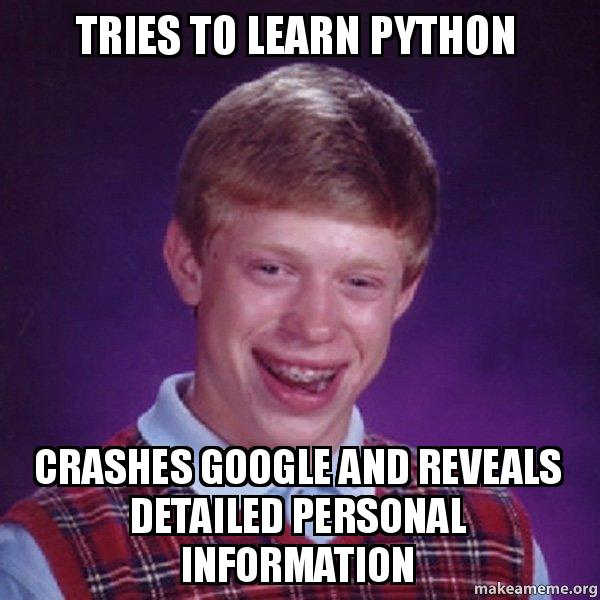

In [74]:
Image('Desktop/Data Science/ДЗ 2/Мем.jpg', width=300, height=300)